# Detect and Remove Outliers in the Data |  Python

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Detect and Remove Outliers in the Data

Detecting and removing outliers in a dataset can be done using various methods. 

Here's a step-by-step guide using Python:

Explore the process of how to detect and remove outliers in data using Python for machine learning tasks. Gain insights into outlier detection techniques, such as statistical methods and visualization tools. Learn how to handle outliers by applying robust statistical measures and preprocessing techniques. Enhance your understanding of outlier impact on machine learning models and improve the accuracy and reliability of your predictions.

## I. Detecting Outliers

We can use different techniques to detect outliers such as:

1.Z-score method

2.IQR (Interquartile Range) method


## II. Removing Outliers

Once the outliers are detected, we can remove them from the dataset.

Here is an example using the Z-score method and the IQR method:

##  I. Z-score Method

The Z-score method standardizes the data and finds outliers based on a threshold. Typically, a Z-score threshold of 3 or -3 is used.

##  II.IQR Method

The IQR method calculates the interquartile range and defines outliers as points outside 1.5 * IQR above the third quartile or below the first quartile.

## III. Percentile Method

The percentile method can be used to handle outliers in a dataset. The percentile method involves setting a threshold based on percentiles and capping or truncating the outlier values accordingly

## Load the Dataset

We will read the data from the csv file 

In [169]:
data=pd.read_csv(r"C:\Users\USER\Documents\Sami's Files\Outlier Removal\WineQT.csv")

data.head()
# print(len(data))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


                                            First 5 rows of the dataframe

In [171]:
len(data)

1143

### Next we will see the statistical summary of the DataFrame

The describe() function in Pandas provides a statistical summary of the DataFrame, including various descriptive statistics such as count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each numerical column in the DataFrame

In [172]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


                                       Statistical summary of the DataFrame

#### We will use the residual sugar column to detect and remove the outliers

## Visualize the Data

### Next we will plot the data

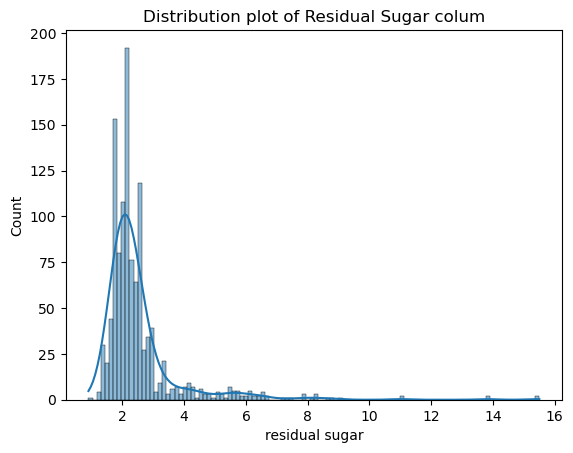

In [177]:
sns.histplot(data['residual sugar'],kde=True)
plt.title('Distribution plot of Residual Sugar colum')
plt.show()

This will generate a histogram plot that displays the distribution of values in the 'residual_sugar' column. 

The plot will include a histogram to visualize the frequency of different values and a smooth curve representing the kernel density estimate

#### There is a outlier as the plot is completely right skewed

### Next we will use boxplot to see the outliers clearly

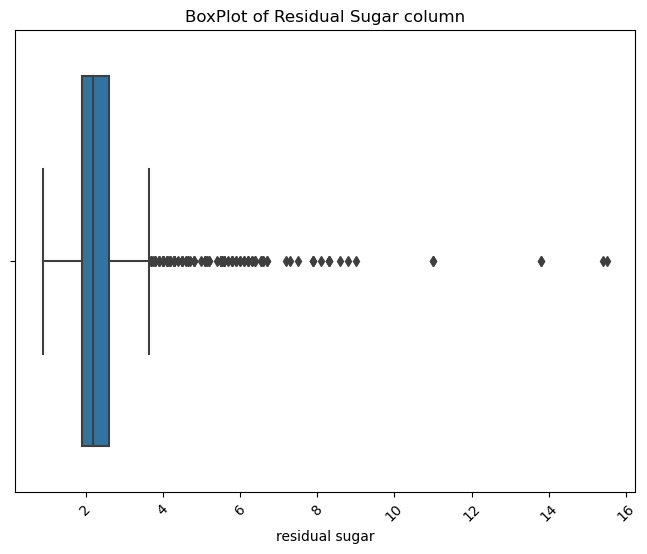

<Figure size 640x480 with 0 Axes>

In [109]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['residual sugar'])

# Rotate the x-axis labels (in case you need it)
plt.xticks(rotation=45)

plt.title('BoxPlot of Residual Sugar column')
# Display the plot

plt.show()


# Save the plot to a PDF file
plt.savefig('boxplot_residual_sugar.pdf', format='pdf')




The code snippet you provided makes use of the sns.boxplot() function from the Seaborn library to create a box plot for the 'residual sugar' variable in the DataFrame df

The box represents the interquartile range (IQR), with the line inside representing the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles. Any points outside of the whiskers are considered potential outliers

# Methods to remove Outliers

### There are different methods using which we can remove outliers. Let us see few of them

# Z-Score Method

The z-score method is a statistical technique used to detect outliers by measuring how many standard deviations a data point is away from the mean. A z-score tells you how relatively far a data point is from the mean in terms of standard deviations

### First we will get the upper and lower limits

In [178]:
# Calculate the mean and standard deviation
mean_value = data['residual sugar'].mean()
std_dev = data['residual sugar'].std()

# Calculate the upper and lower limits
upper_limit = mean_value + 3 * std_dev
lower_limit = mean_value - 3 * std_dev

# print('upper limit:', upper_limit)
# print('lower limit:', lower_limit)

upper limit: 6.5999046310191565
lower limit: -1.5356001690768997


This code snippet calculates the upper limit as the mean plus three times the standard deviation (mean + 3 * std) and the lower limit as the mean minus three times the standard deviation (mean - 3 * std)


These limits define a range beyond which data points are considered outliers based on the z-score method

In [179]:
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 6.5999046310191565
lower limit: -1.5356001690768997


This is the possible upper and lower limit that we can consider

### Next let us find outliers using the limits

In [111]:
# Find outliers

data.loc[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)].head()

## OR

In [113]:
outliers = data[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
114,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.9982,3.37,0.49,9.4,5,163
115,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.9981,3.37,0.49,9.4,5,164
230,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.0015,3.16,0.69,9.2,6,324
231,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.0015,3.16,0.69,9.2,6,325
275,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5,396


                                               Dataframe with outliers

The code snippet uses the upper and lower limits calculated earlier to identify outliers in the 'residual sugar' column of the DataFrame df. It uses boolean indexing to filter the DataFrame and select rows where the 'residual sugar' values are outside the calculated limits

The .loc[] method is used to access the rows in df that meet the specified condition

The condition (df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit) checks whether the 'residual sugar' values are greater than the upper limit or less than the lower limit, indicating outliers.

The resulting DataFrame outliers will contain only the rows where outliers are present in the 'residual sugar' column

### Next we will trim the outliers. 

Trimming is a data transformation technique where outliers are removed or "trimmed" from the dataset, rather than replacing or imputing their values. Trimming involves setting a threshold or cutoff value, and any data points exceeding this threshold are removed from the dataset

In [191]:
# Find and remove outliers
revised_trim = data.loc[(data['residual sugar'] <= upper_limit) & (data['residual sugar'] >= lower_limit)]

print('before removing outliers:', len(data))
print('after removing outliers:', len(revised_trim))
print('outliers:', len(data) - len(revised_trim))

before removing outliers: 1143
after removing outliers: 1120
outliers: 23


### Next let us plot the data after trimming outliers

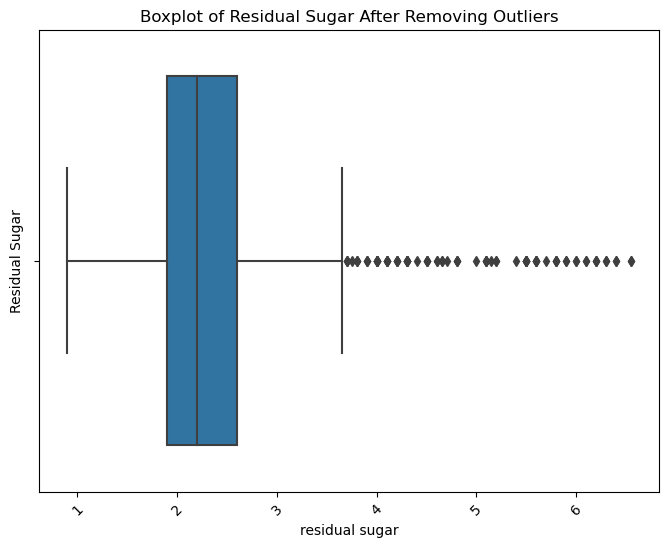

In [192]:
# Plot the data after trimming outliers

plt.figure(figsize=(8, 6))
sns.boxplot(data=revised_trim, x=revised_data['residual sugar'])
plt.title('Boxplot of Residual Sugar After Removing Outliers')
plt.ylabel('Residual Sugar')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


## Next we will perform capping

### Capping, also known as Winsorization, is a technique used to handle outliers by setting a threshold and capping or truncating extreme values to a specified percentile. Capping involves replacing outlier values with less extreme values, thus reducing the impact of outliers on the dataset without entirely removing them

In [227]:
#Capping - change the outlier values to upper limit (or) lower  limit values

# upper limit: 6.59
# lower limit: -1.53


data2 = data.copy()


data2.loc[(data2['residual sugar']>=upper_limit), 'residual sugar']= upper_limit

data2.loc[(data2['residual sugar']<=lower_limit), 'residual sugar'] = lower_limit



#### You are performing capping by changing the outlier values in the 'residual sugar' column of the DataFrame df to the upper or lower limit values.

#### The DataFrame new_df is created as a copy of the original DataFrame df, and the outlier values are replaced accordingly.

#### new_df is created as a copy of df. The upper_limit and lower_limit values are calculated using the mean and standard deviation of the 'residual sugar' column.

#### The .loc[] method is then used to identify the rows where the 'residual sugar' values exceed the upper limit or fall below the lower .

#### The corresponding outlier values are replaced with the upper or lower limit values using the assignment statement.

#### By performing capping in this way, the outlier values in the 'residual sugar' column are replaced with the specified upper or lower limit values, effectively bringing them within the desired range

### Next let us plot the data after performing capping

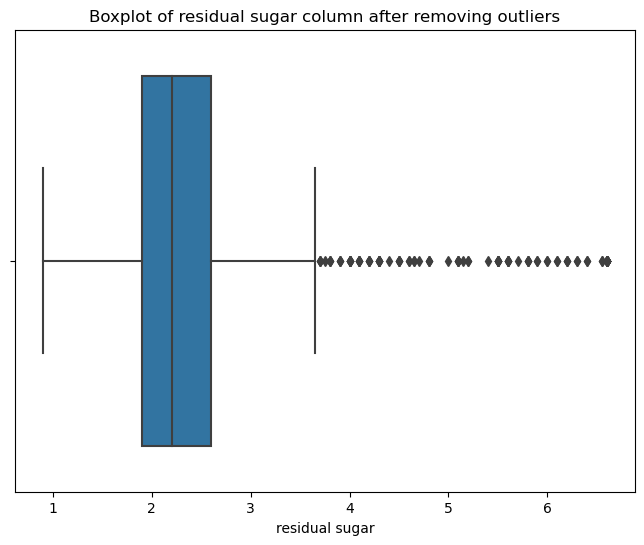

In [228]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data2['residual sugar'])
plt.title('Boxplot of residual sugar column after removing outliers')
plt.show()

Here we have not deleted any of the data rather we have capped it . We can check by printing the length of data

In [128]:
len(data2)

1143

We can see that length of new dataframe is 1143 which is same as the old dataframe

# Inter Quartile Range Method

The Interquartile Range (IQR) method is another statistical technique used to detect and handle outliers in a dataset. The IQR represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset

### First let us calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) of the 'residual sugar' column in the DataFrame df

In [229]:
# Calculate the first quartile (Q1)
q1 = data['residual sugar'].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = data['residual sugar'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print('First Quartile (Q1):', q1)
print('Third Quartile (Q3):', q3)
print('Interquartile Range (IQR):', iqr)

First Quartile (Q1): 1.9
Third Quartile (Q3): 2.6
Interquartile Range (IQR): 0.7000000000000002


In this code, q1 is calculated as the value at the 25th percentile (first quartile) of the 'residual sugar' column using the .quantile() function with a parameter of 0.25
Similarly, q3 is calculated as the value at the 75th percentile (third quartile)

Finally, iqr is computed as the difference between q3 and q1, representing the interquartile ra

By calculating the Q1, Q3, and IQR, you obtain important descriptive statistics that can help in understanding the spread and distribution of the 'residual sugar' data. 

These values are commonly used in the Interquartile Range (IQR) method for outlier detection and other data analysis techniques

In [230]:
q1, q3, iqr

(1.9, 2.6, 0.7000000000000002)

These are the values of Q1, Q3, and IQR for the 'residual sugar' data in your DataFrame

### Next let us calculate the upper and lower limit using the Interquartile Range (IQR) method

In [154]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(0.8499999999999996, 3.6500000000000004)

upper_limit is computed by adding 1.5 times the IQR to Q3 (q3 + (1.5 * iqr)), while

lower_limit is calculated by subtracting 1.5 times the IQR from Q1 (q1 - (1.5 * iqr))

By printing these values, you can obtain the specific lower and upper limits that define the range within which data points are considered non-outliers according to the IQR method

(0.8499999999999996, 3.6500000000000004)

### Next let us plot the data

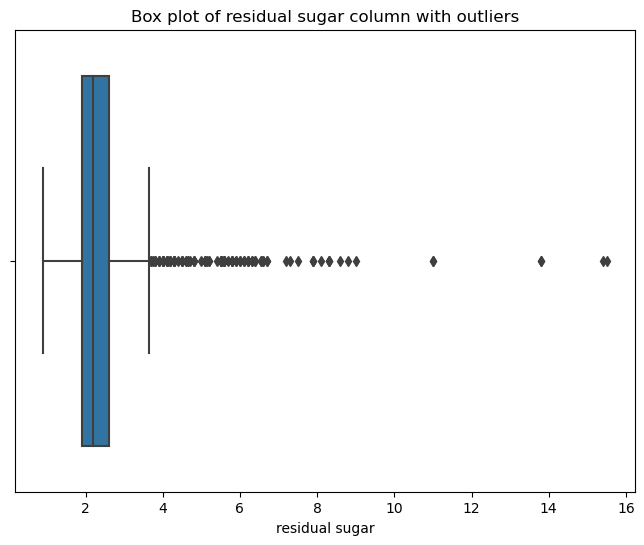

In [233]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data,x=data['residual sugar'])
plt.title('Box plot of residual sugar column with outliers')
plt.show()

### Next we will find the outliers using upper and lower limit calculated earlier

In [157]:
# find the outliers

data.loc[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
25,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.60,6,35
28,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.50,5,40
45,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.90,5,64
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.90,5,65
106,7.1,0.430,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,0.71,10.50,5,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,6.9,0.840,0.21,4.10,0.074,16.0,65.0,0.99842,3.53,0.72,9.25,6,1515
1099,6.2,0.520,0.08,4.40,0.071,11.0,32.0,0.99646,3.56,0.63,11.60,6,1540
1106,6.3,0.680,0.01,3.70,0.103,32.0,54.0,0.99586,3.51,0.66,11.30,6,1552
1111,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5,1558


                                Dataframe with outliers

### Next let us perform trimming of the outliers

In [235]:
# trimming - delete the outlier data
data3 = data.loc[(data['residual sugar'] <= upper_limit) & (data['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(data))
print('after removing outliers:',len(data3))
print('outliers:', len(data)-len(data3))

before removing outliers: 1143
after removing outliers: 1120
outliers: 23


The code snippet performs outlier removal using the calculated upper and lower limits based on the Interquartile Range (IQR) method. It creates a new DataFrame named new_df that includes only the rows with 'residual sugar' values within the calculated limits.


By printing the lengths of df and new_df, you can see the number of rows in the DataFrame before and after removing outliers. Additionally, the difference in lengths (len(df) - len(new_df)) gives you the count of outliers that were removed.

Count of dataframe before and after removing outliers using Inter Quartile Range Method

### Next let us plot the data after trimming outliers

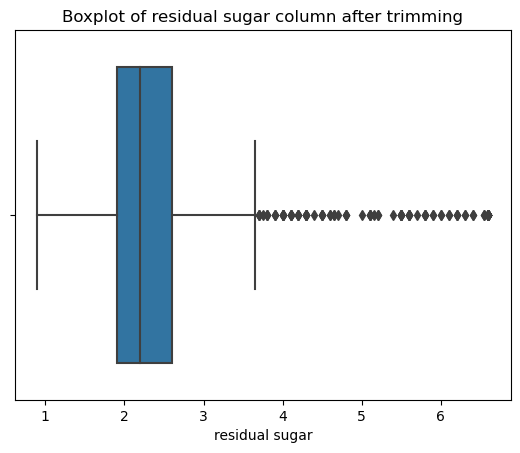

In [236]:
sns.boxplot(data=data2,x=data2['residual sugar'])
plt.title('Boxplot of residual sugar column after trimming')
plt.show()



### Next let us perform capping of the outliers

In [238]:
#capping - change the outlier values to upper (or) lower limit values

data2 = data.copy()
data2.loc[(data2['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
data2.loc[(data2['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

The code snippet performs capping by replacing the outlier values in the 'residual sugar' column of the DataFrame df with the upper or lower limit values. The DataFrame new_df is created as a copy of the original DataFrame df, and the outlier values are modified accordingly     

### Next let us plot the data after performing capping

Text(0.5, 1.0, 'Boxplot of residual sugar column after capping')

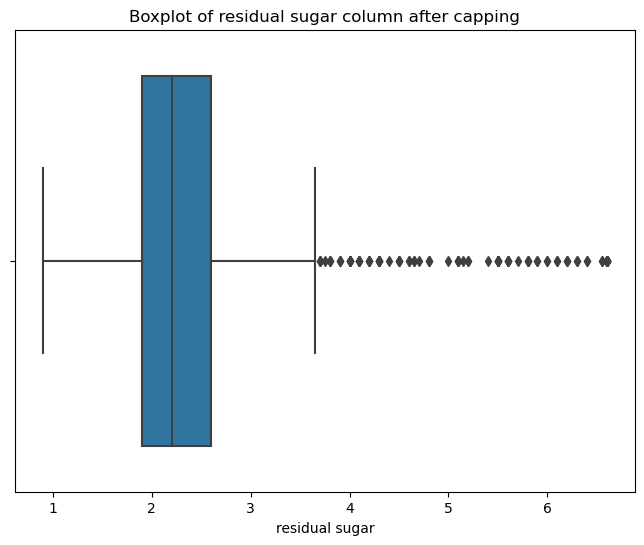

In [243]:

plt.figure(figsize=(8,6))
sns.boxplot(x=data2['residual sugar'])
plt.title('Boxplot of residual sugar column after capping')

# Percentile Method


#### The percentile method can be used to handle outliers in a dataset. The percentile method involves setting a threshold based on percentiles and capping or truncating the outlier values accordingly


## First let us calculate the upper and lower limit

In [245]:
upper_limit = data['residual sugar'].quantile(0.99)
lower_limit = data['residual sugar'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 8.215999999999985
lower limit: 1.4


The quantile() function in pandas is used to calculate the desired percentiles of the 'residual sugar' column in the DataFrame df


upper_limit is calculated as the value at the 99th percentile (0.99) of the 'residual sugar' column, and lower_limit is calculated as the value at the 1st percentile (0.01)


By printing these values, you can obtain the specific upper and lower limits that define the range within which data points are considered non-outliers according to the percentile method. These limits are calculated based on the specified percentiles and can be used to handle outliers in the 'residual sugar' column of your dataset


## Next let us plot the data

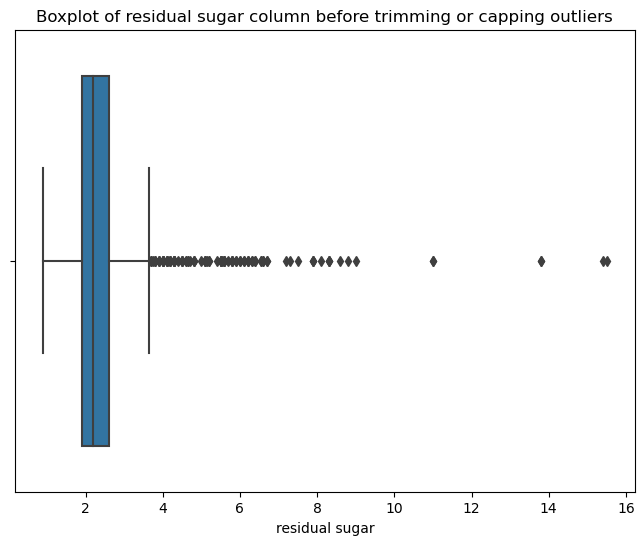

In [247]:


plt.figure(figsize=(8,6))
sns.boxplot(data=data,x=data['residual sugar'])
plt.title('Boxplot of residual sugar column before trimming or capping outliers')
plt.show()


### Next we will find the outliers using upper and lower limit calculated earlier

In [248]:
 #find the outliers
    
data.loc[(data['residual sugar'] > upper_limit) | (data['residual sugar'] < lower_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,7
112,7.6,0.68,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4,161
230,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,324
231,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,325
300,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,428
331,8.7,0.82,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5,469
339,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5,480
348,6.5,0.39,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6,494
460,6.7,0.42,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6,649
493,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6,695


                                Dataframe with outliers

### Next let us perform trimming of the outliers

In [251]:
# trimming - delete the outlier data
data3 = data.loc[(data['residual sugar'] <= upper_limit) & (data['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(data))
print('after removing outliers:',len(data3))
print('outliers:', len(data)-len(data3))

before removing outliers: 1143
after removing outliers: 1121
outliers: 22


The code snippet filters the DataFrame df based on the upper and lower limits calculated using the percentile method. It creates a new DataFrame named new_df that includes only the rows with 'residual sugar' values within the calculated limit

### Next let us plot the data after trimming outliers

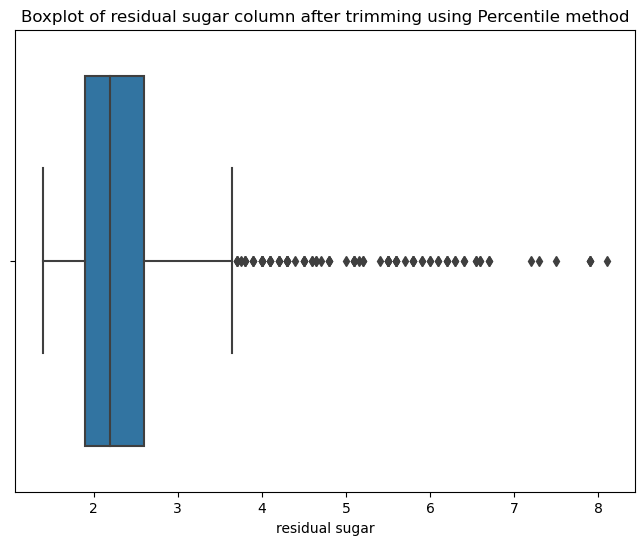

In [254]:

plt.figure(figsize=(8,6))
sns.boxplot(data=data3,x=data3['residual sugar'])
plt.title('Boxplot of residual sugar column after trimming using Percentile method')
plt.show()

### Next let us perform capping of the outliers

In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit

The code you provided performs capping by replacing the outlier values in the 'residual sugar' column of the DataFrame df with the upper or lower limit values. The DataFrame new_df is created as a copy of the original DataFrame df, and the outlier values are modified accordingly

### Next let us plot the data after performing capping

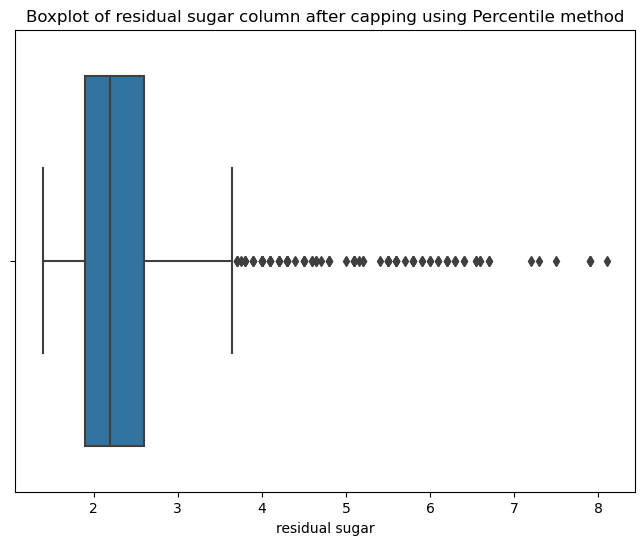

In [258]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data3['residual sugar'])
plt.title('Boxplot of residual sugar column after capping using Percentile method')
plt.show()

## Next let us plot the distplot for both old and new dataframe

C:\Users\USER\AppData\Local\Temp\ipykernel_30412\4050080523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['residual sugar'])


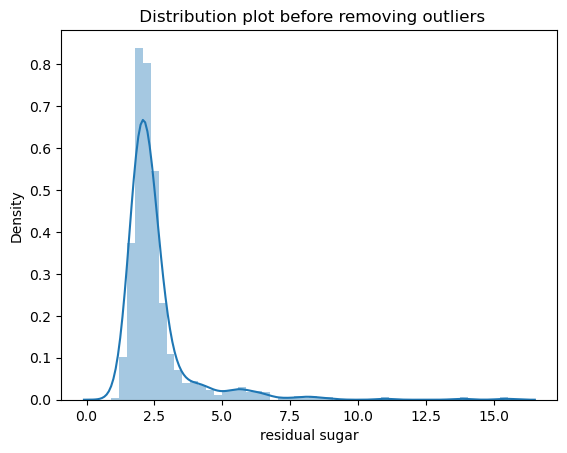

In [266]:
sns.distplot(data['residual sugar'])
plt.title(' Distribution plot before removing outliers')
plt.savefig('distribution_plot_before_removing_outliers.pdf', format='pdf')

plt.show()

                Distribution plot before removing outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_30412\2886340093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data3['residual sugar'])


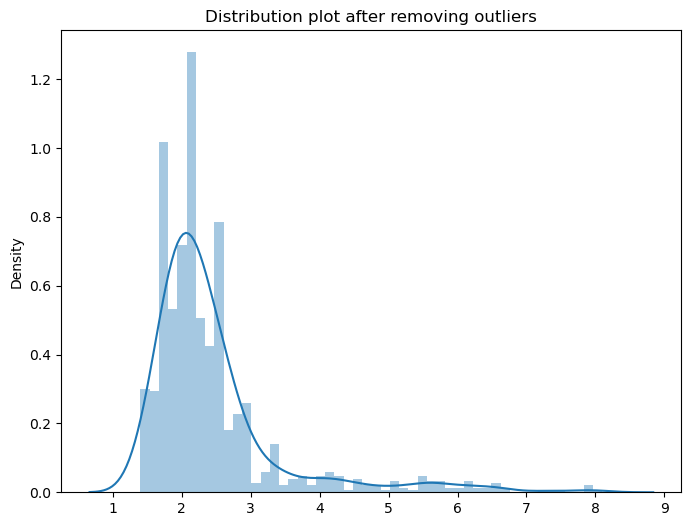

In [265]:
plt.figure(figsize=(8,6))
sns.distplot(x=data3['residual sugar'])
plt.title('Distribution plot after removing outliers')

# Save the plot to a PDF file
plt.savefig('distribution_plot_after_removing_outliers.pdf', format='pdf')

plt.show()


                     Distribution plot after removing outliers


## Final Thoughts on Outliers

## Summary of Methods Explored

In this article, we have explored how to detect and remove outliers using various methods:

Z-Score Method: Identifying data points that fall outside a certain threshold based on the standard deviation.

Interquartile Range (IQR) Method: Identifying outliers using the first (Q1) and third quartiles (Q3) and the interquartile range.

Percentile Method: Using percentiles to detect and handle outliers.

Trimming and Capping: Techniques to remove or adjust outliers based on the methods mentioned above.


By following these methods, we can ensure that our dataset is clean and suitable for accurate analysis and modeling.